# mg_1_2_vs_dg
This notebooks is to compare the DG computed by RNA-MAP compared to the mg2+/2 and other chemical mapping values

## metadata
- project: 
- constructs: 
- experiments: 
- sequencing-runs: 

## setup notebook

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
pd.set_option('display.max_rows', None)


In [2]:
# custom code imports

In [3]:
# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 24

# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [4]:
def r2(x, y):
    return round(stats.pearsonr(x, y)[0] ** 2, 3)


def plot_reg_with_r2(x, y, data):
    fig, ax = plt.subplots()
    sns.regplot(x=x, y=y, data=data, line_kws={"label": r2(data[x], data[y])}, ax=ax)
    plt.legend()
    return ax

## load data

In [5]:
df = pd.read_json("../data/mttr6_data_full.json")
# messed up ttr
df = df[~df["name"].isin(["CAUGA_UCUAAA", "UAUGG_CUUAAC", "UACGG_CCUACA", "CACGG_CCUCAC", "CAUGC_GCUCAA", "CAUGC_GCUGAA"])]
df['ln_gaaa_avg'] = np.log(df['gaaa_avg'])
df['ln_mg_1_2'] = np.log(df['mg_1_2'])

### print out metadata

In [6]:
# print out stats about the data that I want to include in metadata
cols = "code,exp_name,run_name".split(",")
for c in cols:
    print(f"{c}: {' '.join(np.array(df[c].unique()))}\n")

code: C0086 C0083 C0084 C0085

exp_name: 2022_08_19_C0086_50mM_NaC_Mg_titra_CM mtt6_mutations_set_4_50mM-NaC_1.5-mM-Mg2+ 2022_08_12_C0083_50mM_NaC_Mg_titra_CM 2022_08_16_C0084_50mM_NaC_Mg_titra_CM 2022_08_18_C0085_50mM_NaC_Mg_titra_CM

run_name: 2022_08_25_mtt6_set4_1st3_seq 2022_08_26_mtt6_set4_2nd3_seq 2022_08_29_mtt6_seq 2022_08_30_mtt6_set4_seq 2022_08_31_mtt6_set4_seq 2022_09_01_mtt6_set4_seq 2022_08_26_mtt6_set1-3_MgTitra_KU_seq



## Comparision with ln gaaa reactivity

mtt6_mutations_set_4_50mM NaC_0.25 mM Mg2+ was assigned to 0.2 instead of 0.25

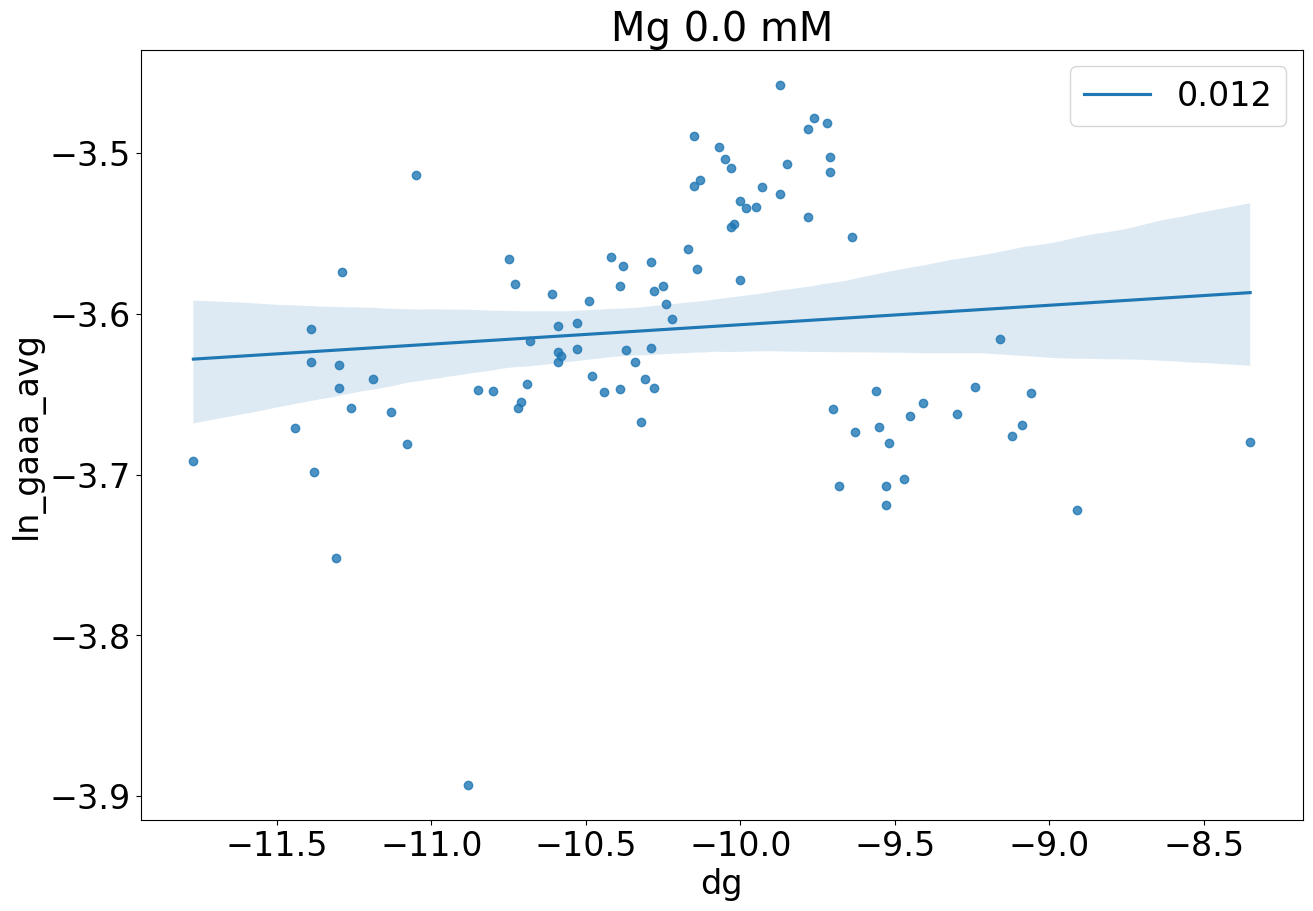

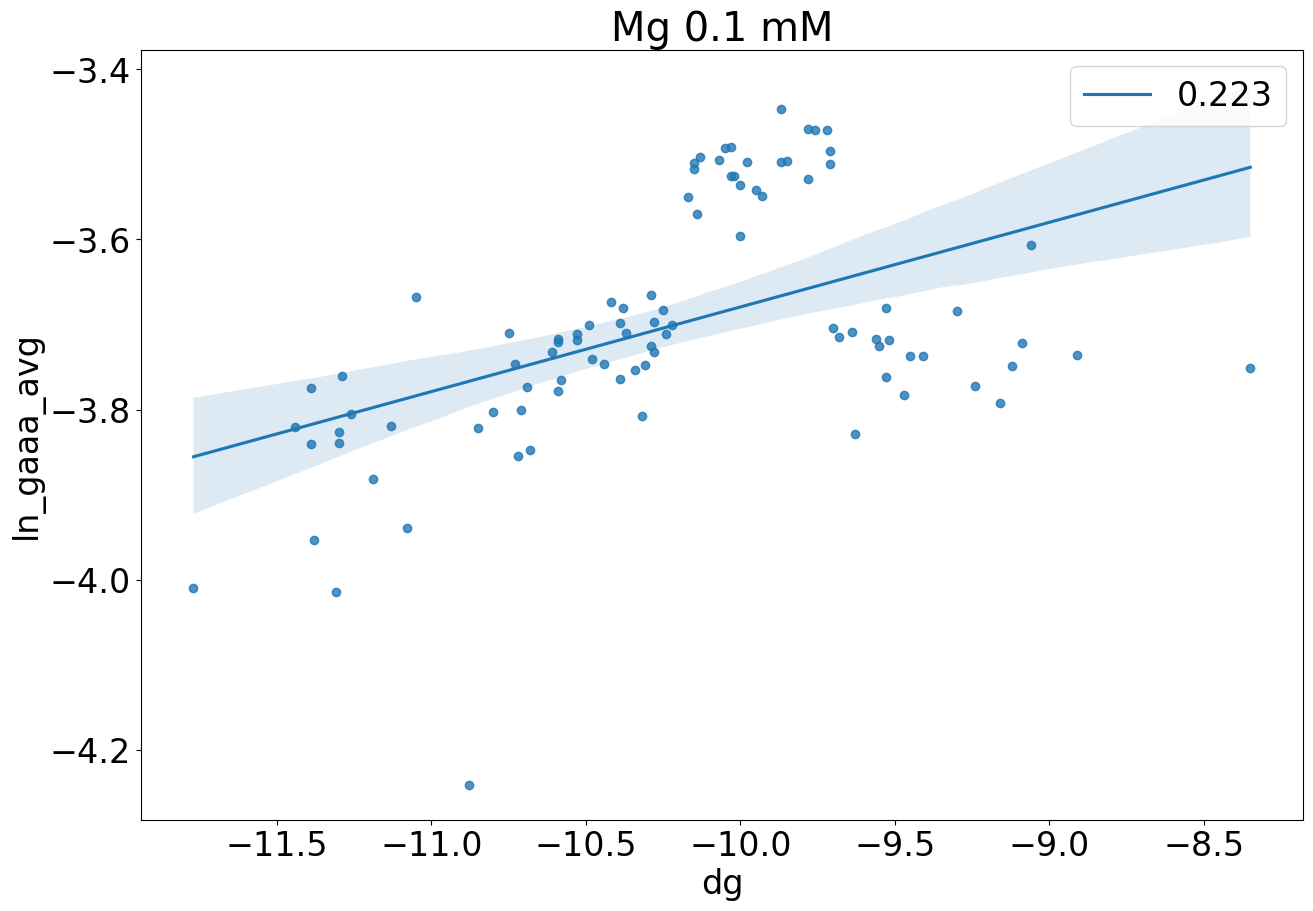

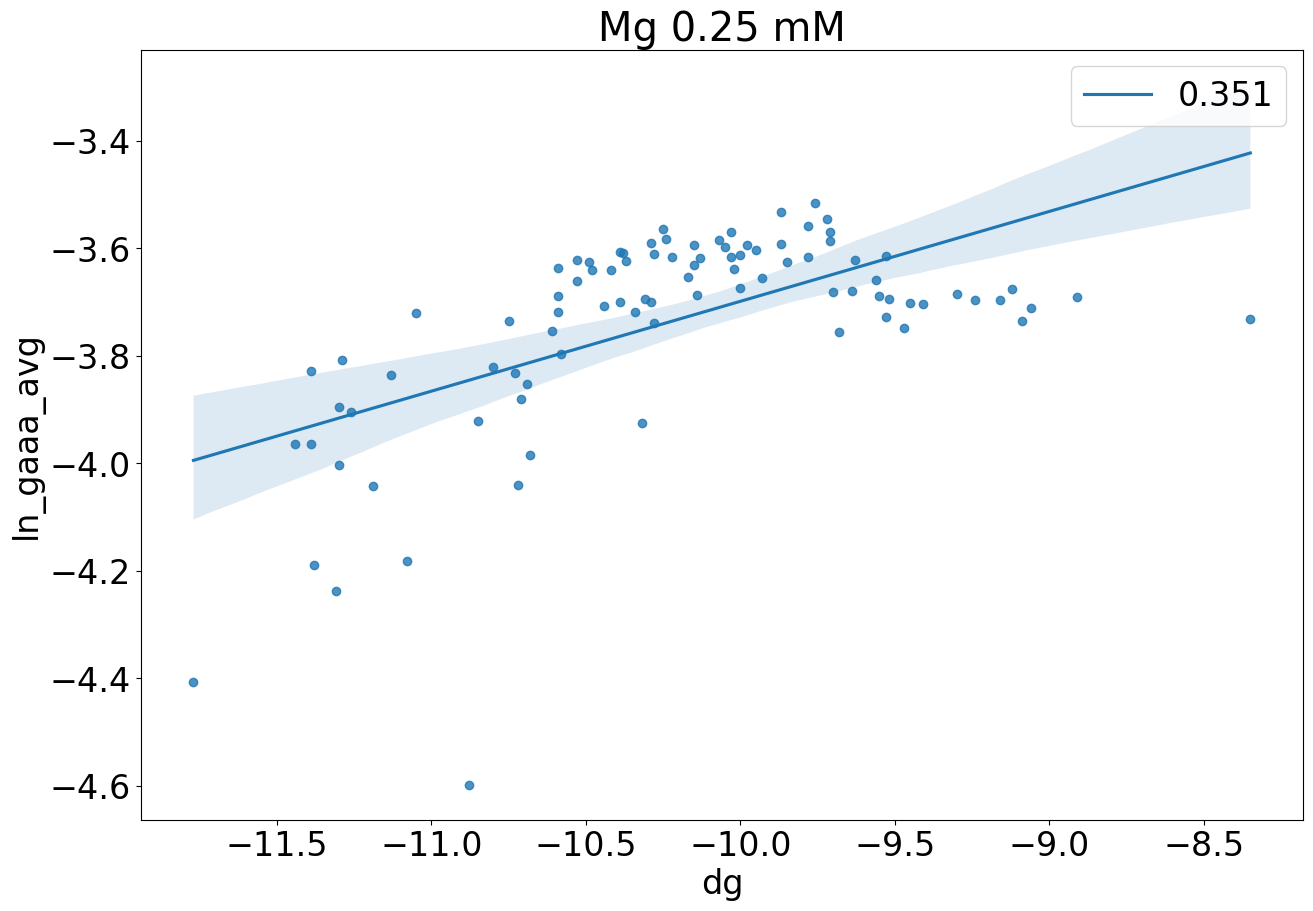

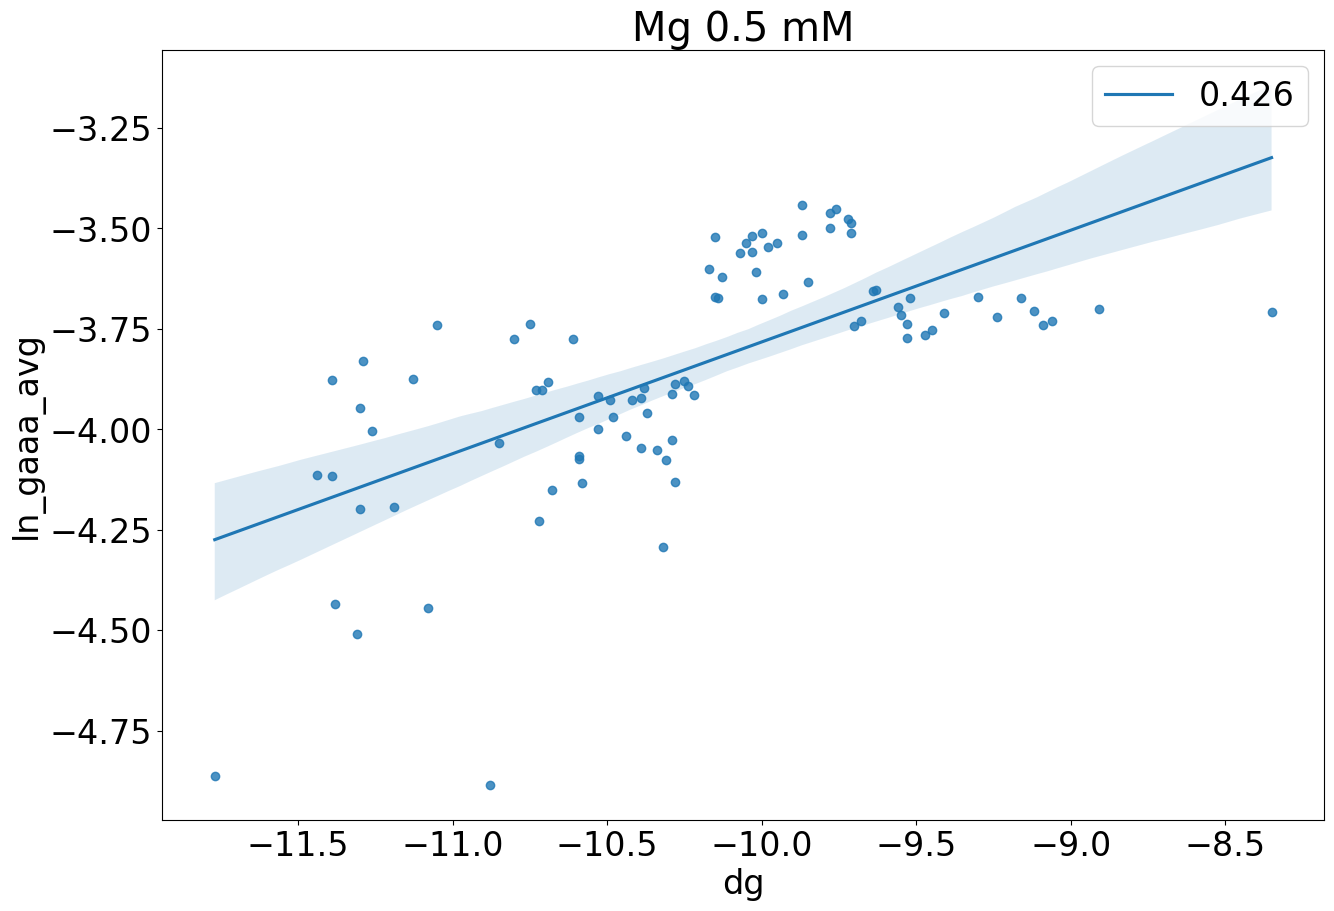

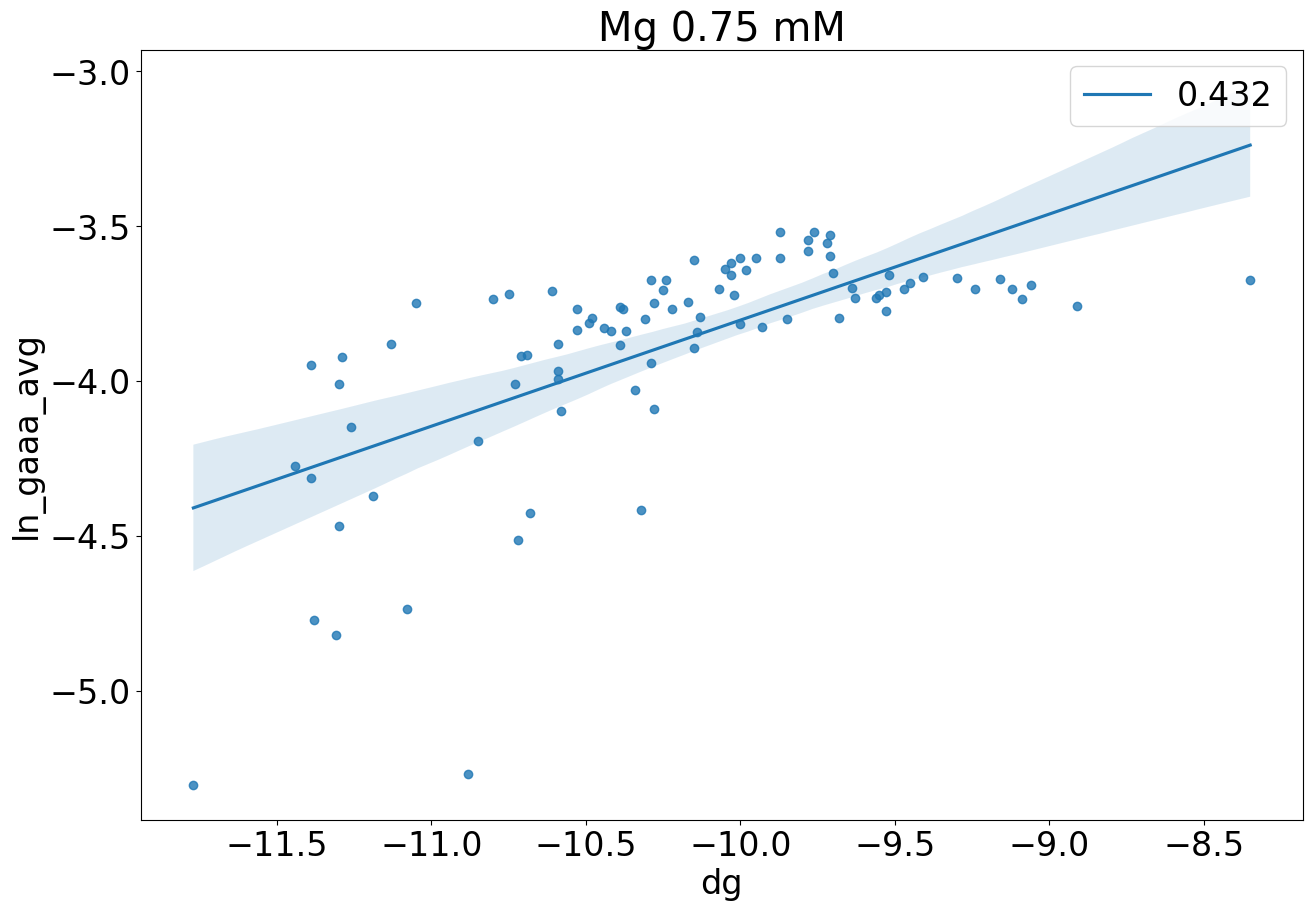

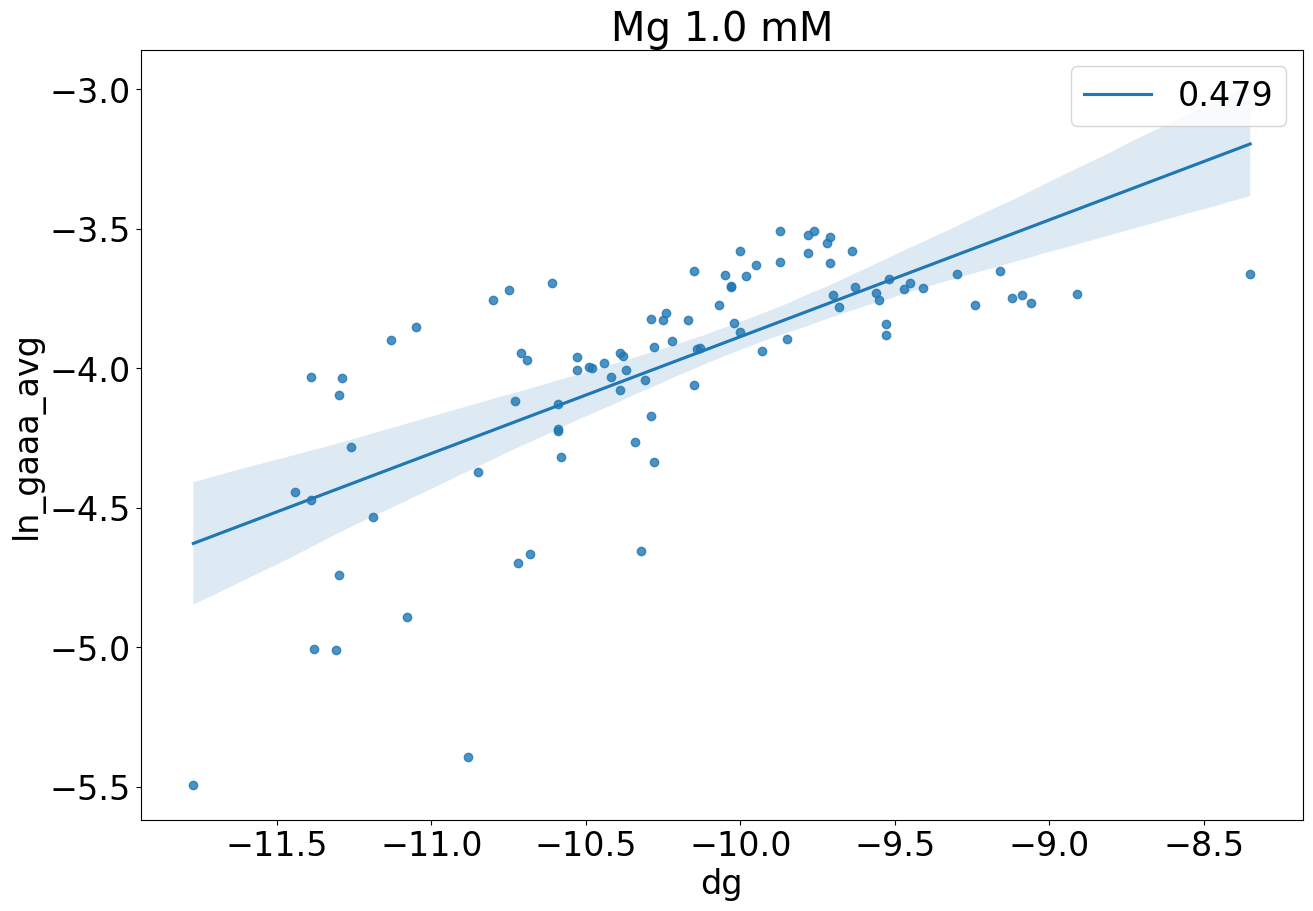

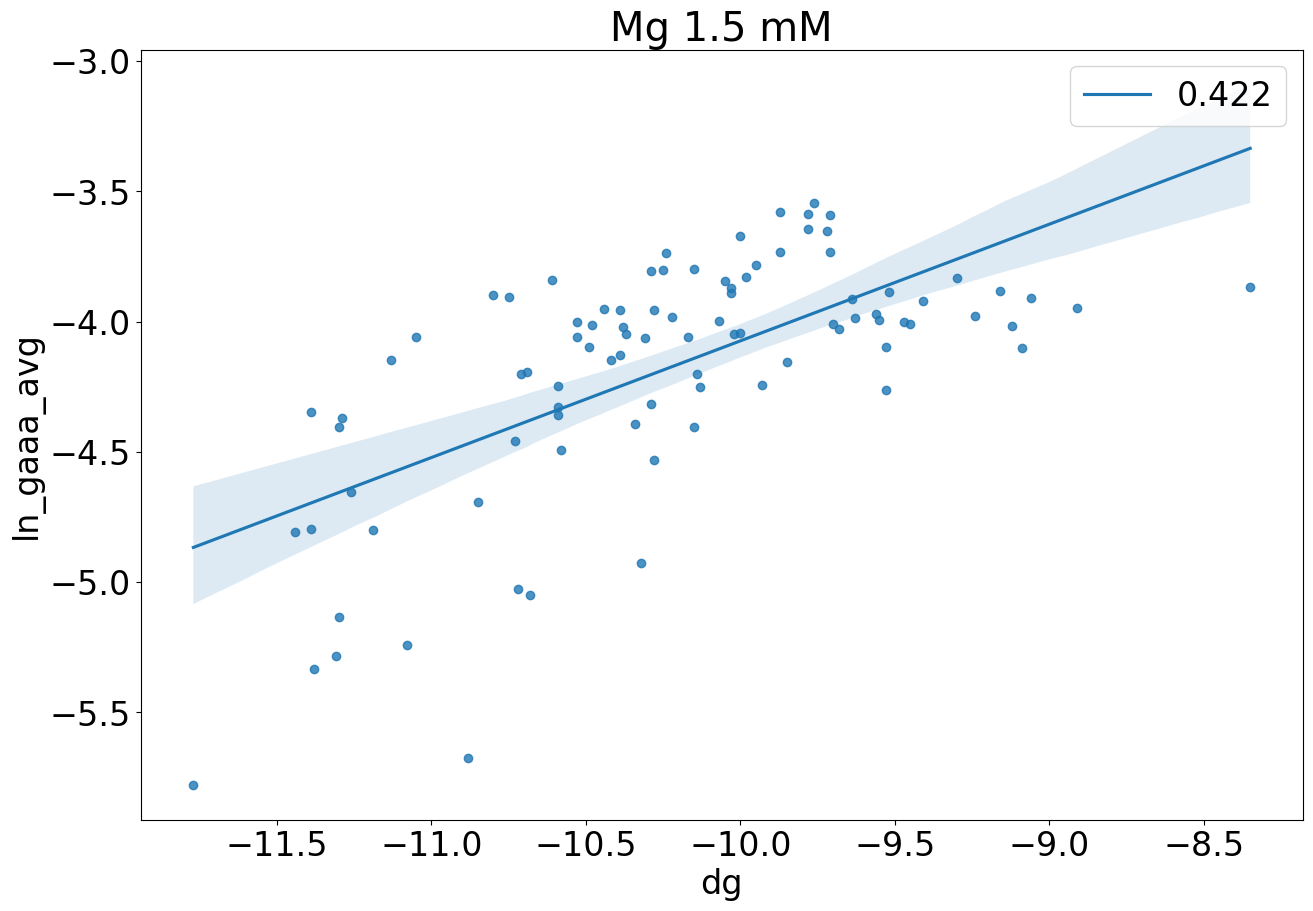

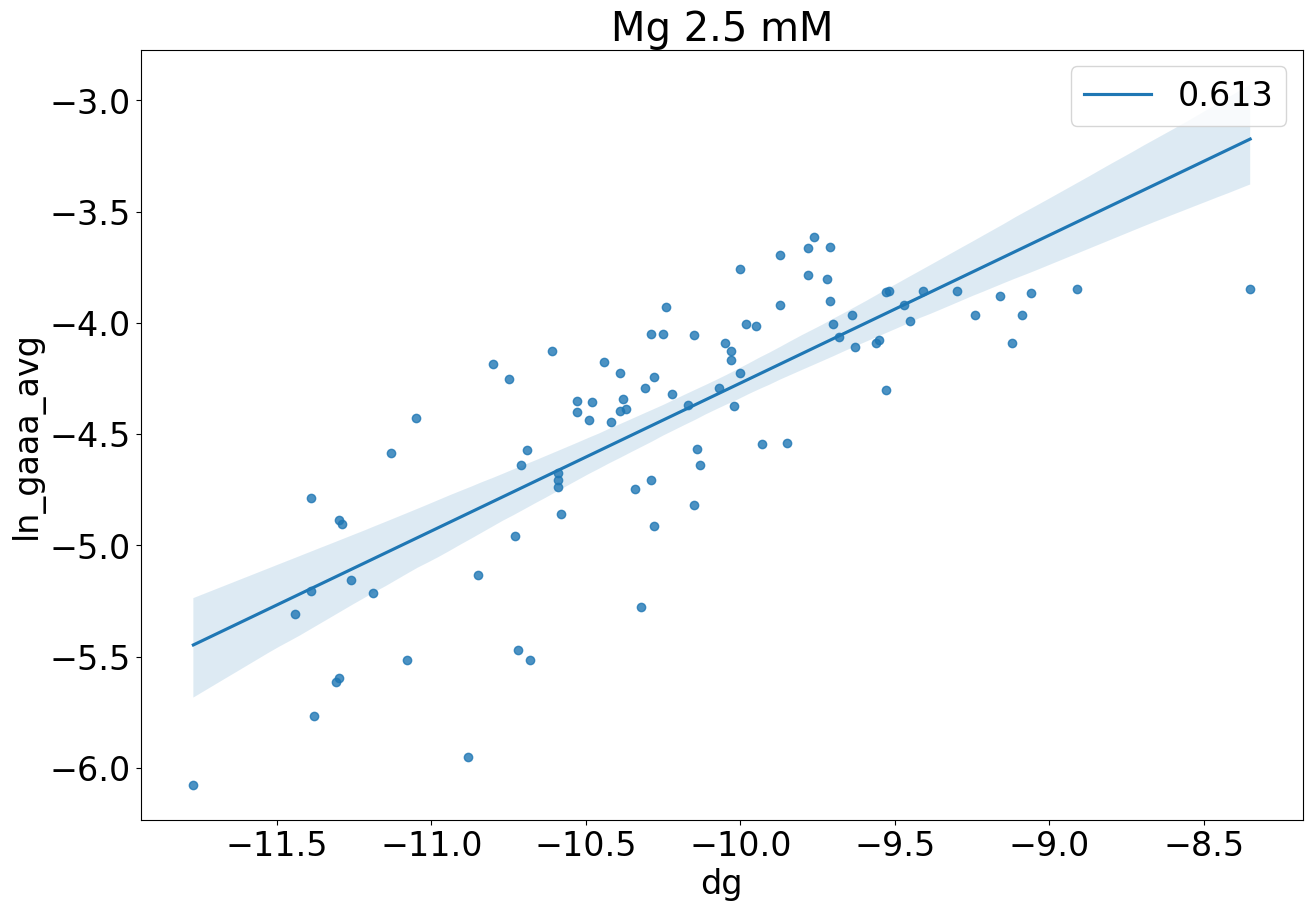

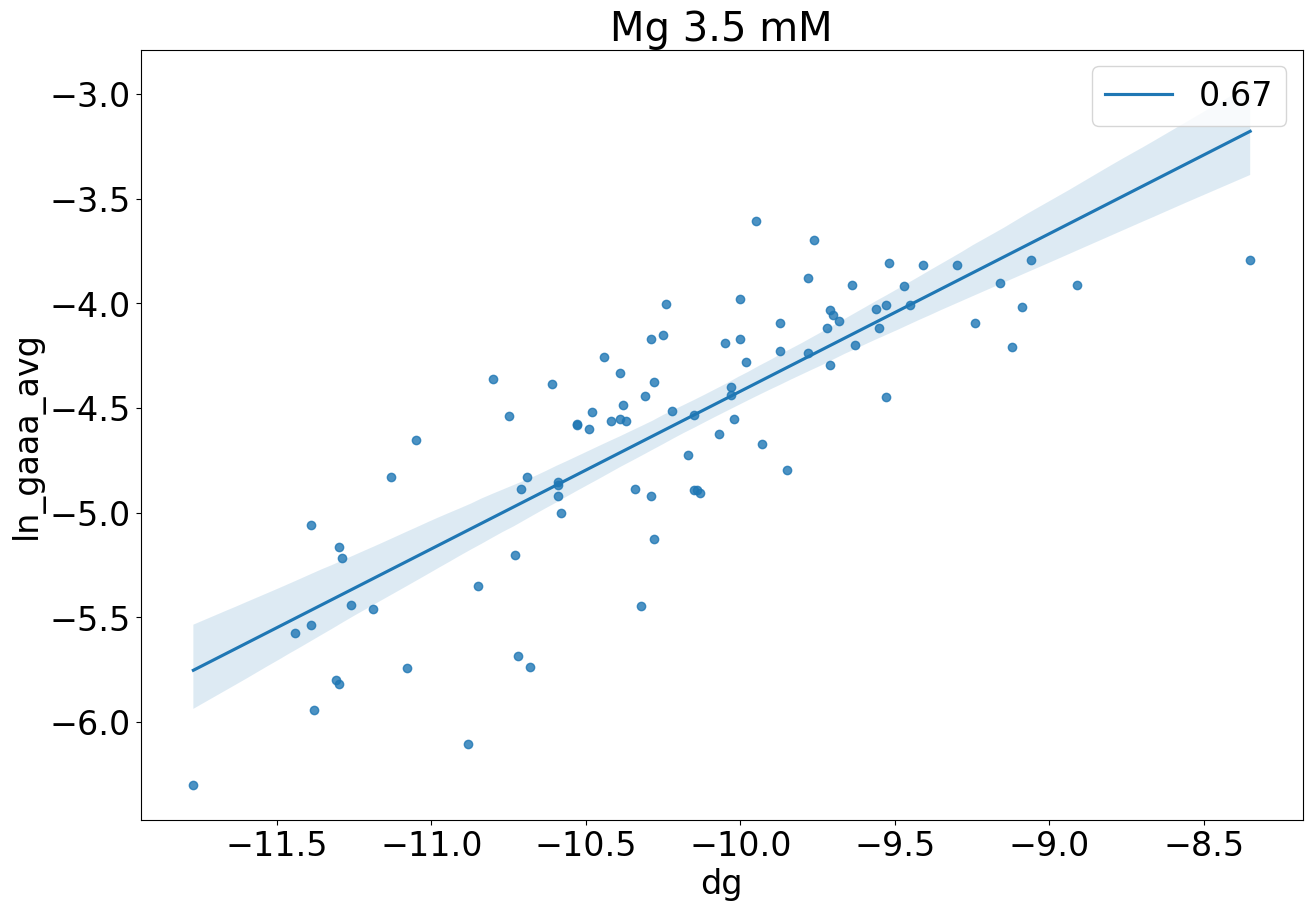

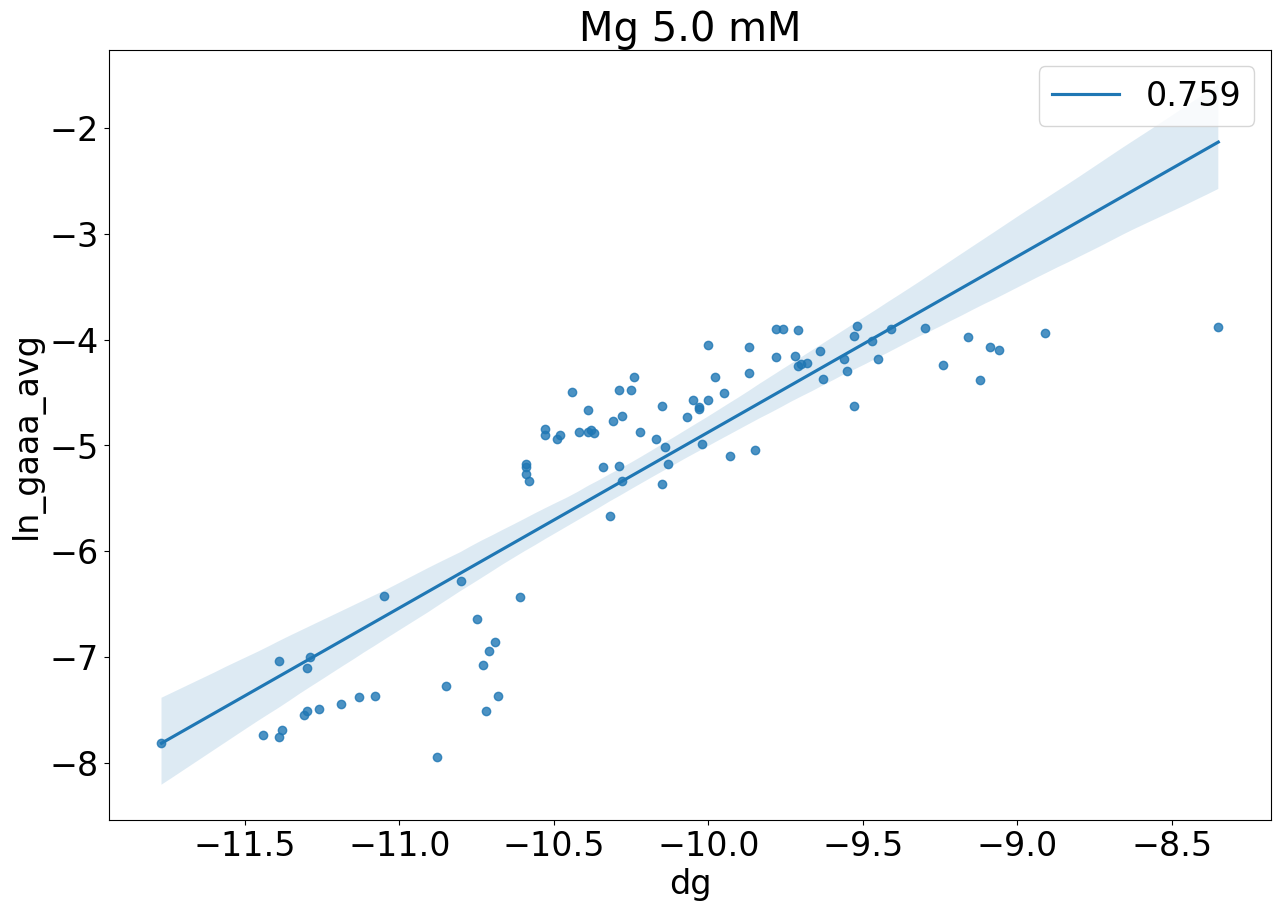

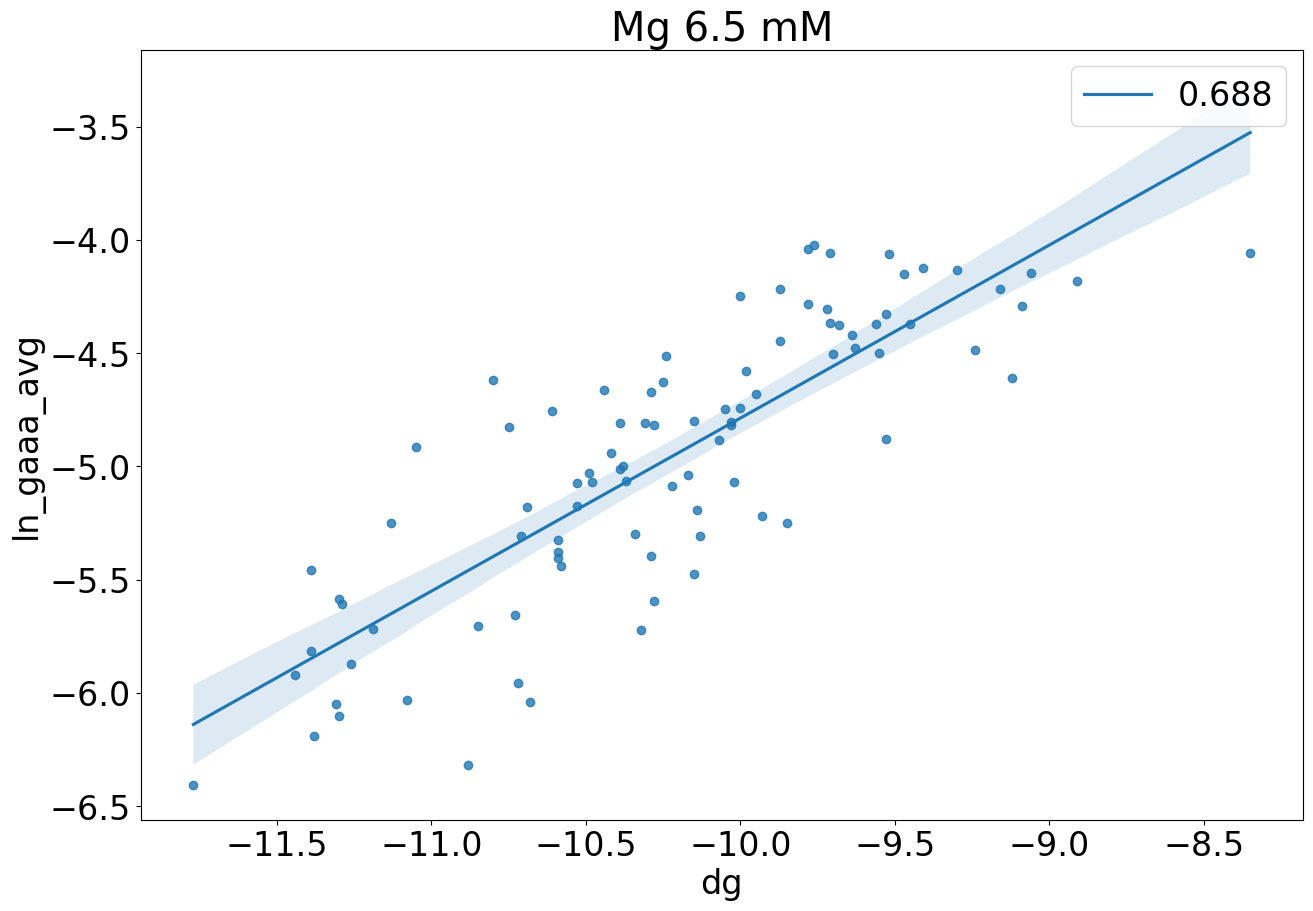

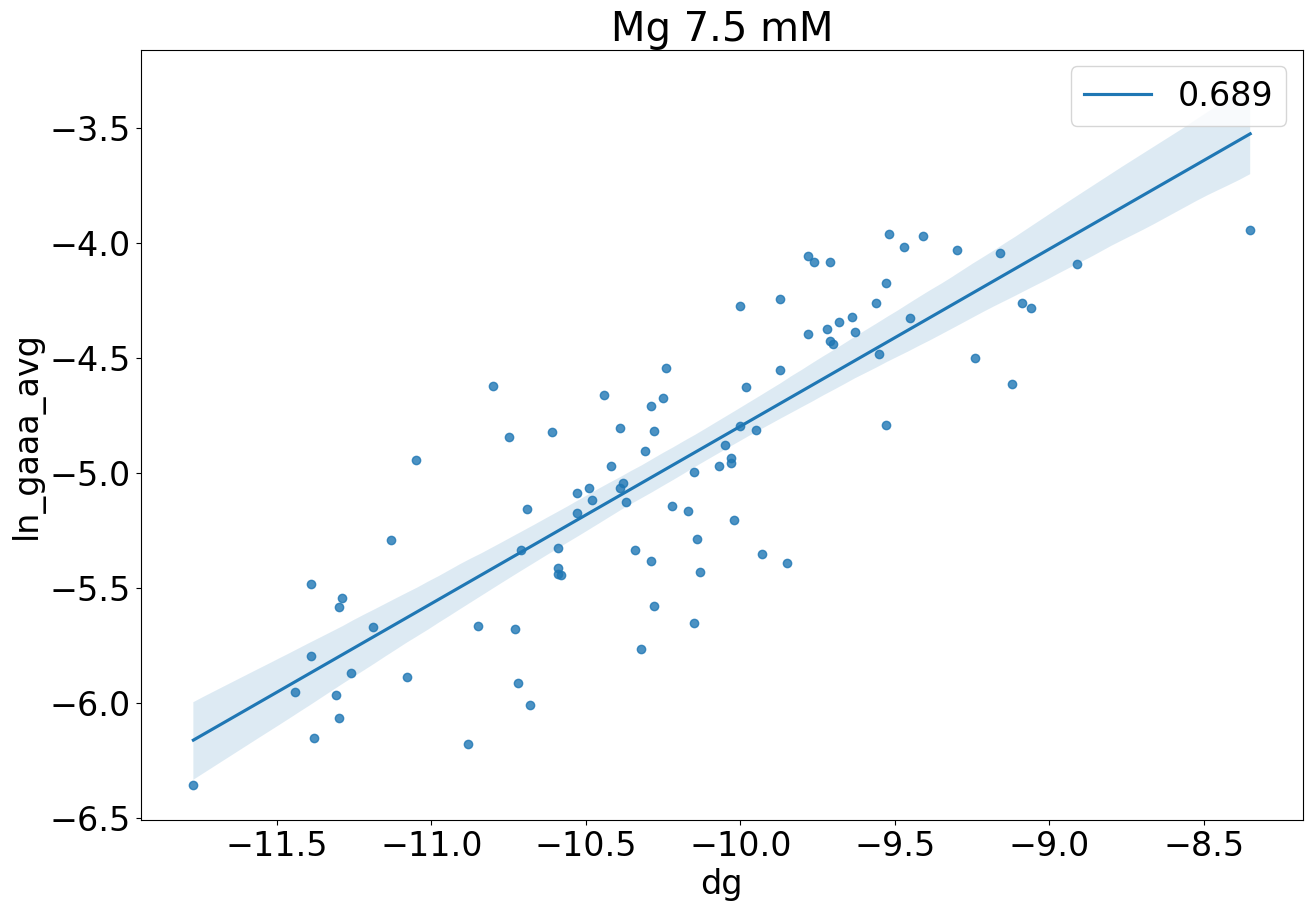

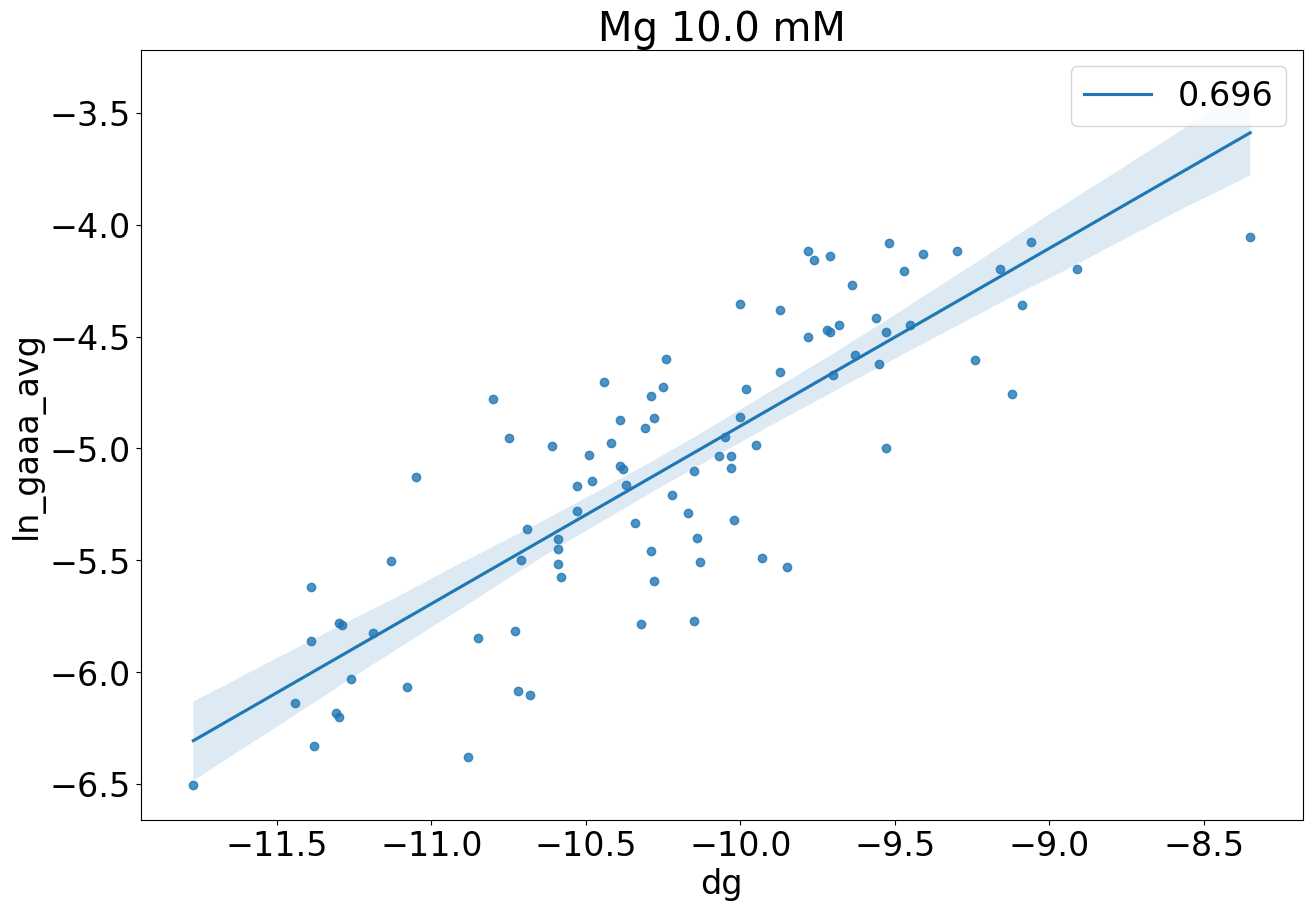

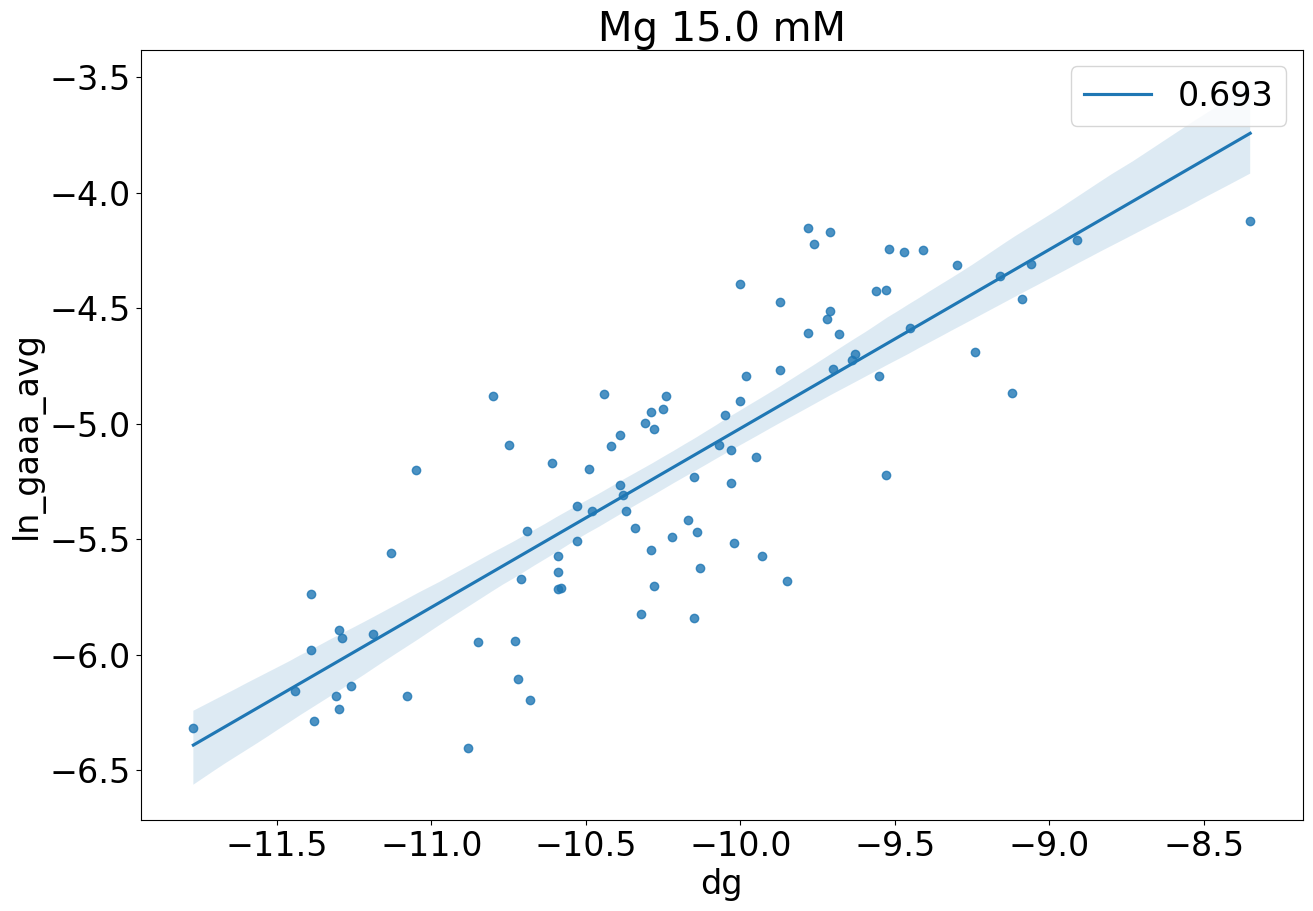

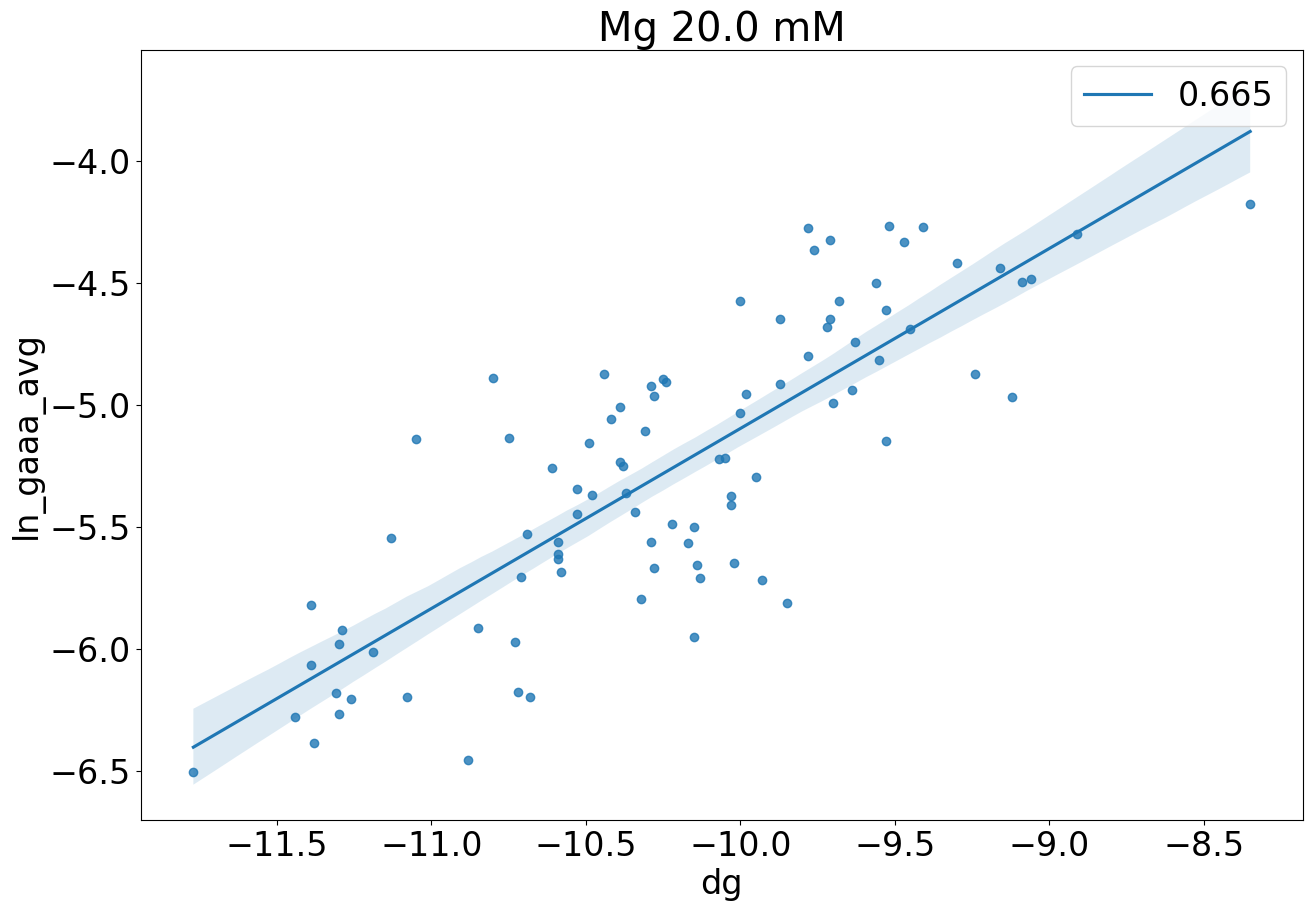

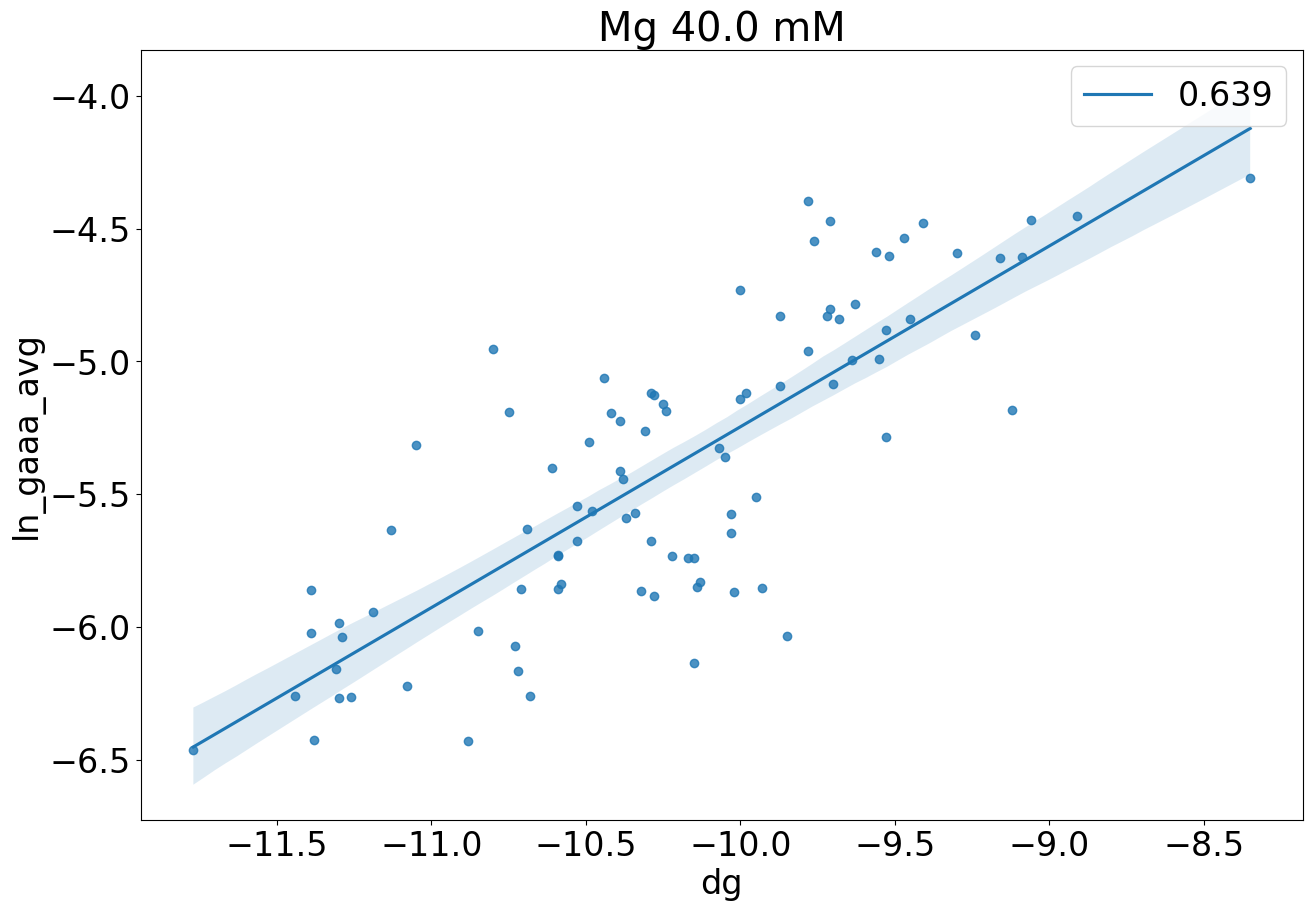

In [7]:
for mg_conc, g in df.groupby("mg_conc"):
    plot_reg_with_r2("dg", "ln_gaaa_avg", g)
    plt.title(f"Mg {mg_conc} mM")

Text(0, 0.5, 'ln Mg 1/2 ')

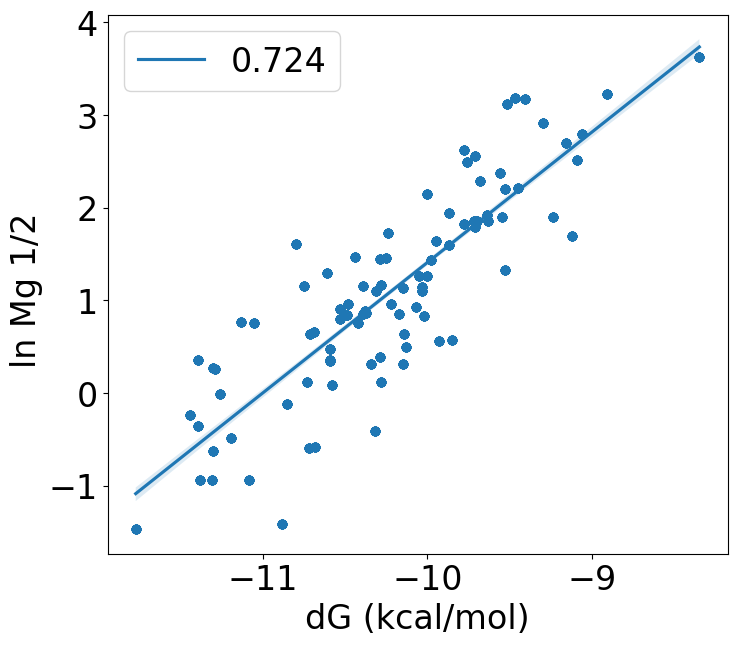

In [16]:
#df_sub = df[df["ln_mg_1_2"] < 4]
df_sub = df
data = df_sub
x = "dg"
y =  "ln_mg_1_2"
# Create a new figure
fig = plt.figure(figsize=(8, 7))

# Add a subplot with a specific aspect ratio
ax = fig.add_subplot(111, aspect='auto')
sns.regplot(x=x, y=y, data=data, line_kws={"label": r2(data[x], data[y])}, ax=ax)
plt.legend()
plt.xlabel("dG (kcal/mol)")
plt.ylabel("ln Mg 1/2 (mM)")

#ax = plot_reg_with_r2("dg", "ln_mg_1_2", df_sub)

In [9]:
df_sum = df.drop_duplicates(subset='name', keep='first')
df_sum.sort_values("mg_1_2")[["name", "dg", "mg_1_2"]]


,name,dg,mg_1_2
656,CAUGG_CCUAAA,-11.77,0.229654
528,CAGGG_CCUAAA,-10.88,0.242240
544,CACGC_GCUAAA,-11.08,0.388894
752,CAUGG_CCUACA,-11.31,0.389457
448,CACGG_CCUAAA,-11.38,0.392431
624,GACGG_CCUAAG,-11.30,0.532728
720,UACGG_CCUAAG,-10.72,0.549241
384,CAAGG_CCUAAC,-10.68,0.554912
560,CAAGG_CCUAAA,-11.19,0.611753
1008,UACGC_GCUAAG,-10.32,0.663908
